In [2]:
import logging
import logging.config
import time

# Càrrega de la configuració des del fitxer 'logging.conf'
logging.config.fileConfig('logging.conf')

# Crear loggers
logger = logging.getLogger('ejemplofichero')
csv_logger = logging.getLogger('csvlogger')

# Bucle principal
while True:
    try:
        logger.debug('Missatge de depuració cada dos segons')
        logger.info('Missatge informatiu cada dos segons')
        csv_logger.info('Registre en format CSV cada dos segons')
        time.sleep(2)  # Pausa de 2 segons
    except KeyboardInterrupt:
        logger.error('El programa s\'ha interromput manualment')
        break

2024-11-21 18:04:11,022 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-21 18:04:11,022 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-21 18:04:11,024 - csvlogger - INFO - Registre en format CSV cada dos segons
2024-11-21 18:04:13,026 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-21 18:04:13,026 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-21 18:04:13,027 - csvlogger - INFO - Registre en format CSV cada dos segons
2024-11-21 18:04:15,028 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-21 18:04:15,028 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-21 18:04:15,030 - csvlogger - INFO - Registre en format CSV cada dos segons
2024-11-21 18:04:17,031 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-21 18:04:17,031 - ejemplofichero - INFO - Missatge informatiu cada dos segons
2024-11-21 18:04:17,034 - csvlogger - INFO - Registre en for

In [ ]:
Exercici 3

Mitjançant les eines proposades a continuació, voldríem elaborar una petita aplicació
que permetés a un treballador de forma senzilla introduir mitjançant un fitxer json, txt
csv o similar introduir unes dades que escollim i li elaborem una sèrie de gràfiques.
Abans d’això, caldrà informar-se sobre les següents eines, alguna de les quals potser
ja coneixeu.
    

Pandas
    
Funcionalitat:
És una biblioteca de Python per a l’anàlisi i manipulació de dades. Ofereix estructures com:
DataFrame: per gestionar dades tabulars (similar a una taula Excel).
Operacions potents per filtrar, ordenar, agrupar i calcular estadístiques sobre grans volums de dades.
Funcions per llegir i escriure en formats com JSON, CSV, Excel, etc.

import pandas as pd
data = pd.read_csv('logs.csv')
print(data.head())  # Mostra les primeres línies del fitxer

In [ ]:
2. Jupyter Notebook
Funcionalitat:
És un entorn interactiu per desenvolupar codi en Python, especialment útil per:

Escriure i provar codi de manera incremental.
Documentar el procés amb cel·les explicatives (Markdown) i gràfics integrats.
Generar visualitzacions i informes en temps real.

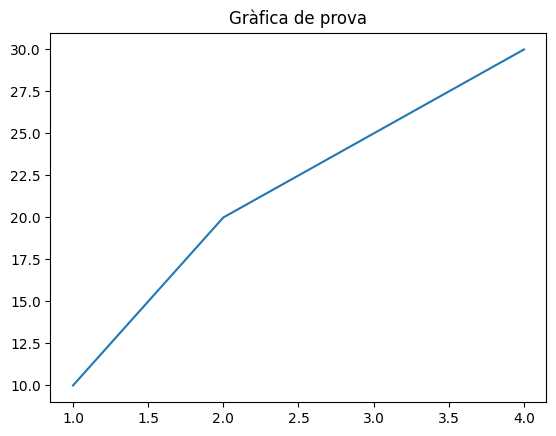

In [4]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title("Gràfica de prova")
plt.show()

In [ ]:
3. ReportLab
Funcionalitat:
És una llibreria per generar documents PDF de manera programada. És ideal per crear informes o resums de dades amb gràfiques, taules i text formatat.

Prova realitzada (exemple):

In [ ]:
from reportlab.pdfgen import canvas
c = canvas.Canvas("informe.pdf")
c.drawString(100, 750, "Informe generat automàticament")
c.save()


In [ ]:
Proposta final
Eines seleccionades:
Per a l'aplicació demanada, utilitzarem una combinació de Pandas, Jupyter Notebook i ReportLab, per les següents raons:

Pandas: permet una manipulació eficient de dades provinents de fitxers (CSV, JSON o altres).
Jupyter Notebook: ideal per desenvolupar prototips i visualitzar gràfiques de manera interactiva.
ReportLab: es farà servir per generar un informe professional en format PDF amb el resum i gràfiques generades.

In [ ]:
Exemple d'aplicació
Càrrega i processament de dades amb Pandas:

In [ ]:
import pandas as pd
dades = pd.read_csv("logs.csv")
resum = dades.groupby("Departament").mean()
print(resum)

In [ ]:
Visualització de dades amb Jupyter Notebook: